<a href="https://colab.research.google.com/github/NSworks/Methods-of-Knowledge-Engineering/blob/main/Kopia_notatnika_Projekt_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projekt 1
##1. Napisz program, uczący się gry “papier, kamień, nożyce”. Jako algorytm uczący zastosuj łańcuch Markowa z macierzą przejść pomiędzy trzema stanami (Papier, Kamień, Nożyce). Nauka gry polega na korekcie macierzy przejść (prawdopodobieństwa warunkowe zmiany stanu),
##2. Wartość wypłaty: 1 w przypadku wygranej, −1 w przypadku przegranej i 0 w przypadku remisu,
##3. Przeprowadź ciąg kilkudziesięciu gier “kamień, papier, nożyce”. Sporząź wykres jak zmienia się stan kasy w każdym kroku gry.

Input your choice (R,P,S) to dialog window to START.
Input 'X' to exit the game
Game no. 1
Your move: P
Opponent move: S
0
You lost!
***** *** * ************
Game no. 2
Your move: R
Opponent move: S
-1
You won!
***** *** * ************
Game no. 3
Your move: S
Opponent move: R
0
You lost!
***** *** * ************
Game no. 4
Your move: R
Opponent move: S
-1
You won!
***** *** * ************
Game no. 5
Your move: P
Opponent move: R
0
You won!
***** *** * ************
Game no. 6
Your move: R
Opponent move: R
1
Draw!
***** *** * ************
Game no. 7
Your move: P
Opponent move: P
1
Draw!
***** *** * ************
Game no. 8
Your move: R
Opponent move: R
1
Draw!
***** *** * ************
Game no. 9
Your move: R
Opponent move: P
1
You lost!
***** *** * ************
Game no. 10
Your move: P
Opponent move: R
0
You won!
***** *** * ************
Game no. 11
Your move: P
Opponent move: P
1
Draw!
***** *** * ************
Game no. 12
Your move: S
Opponent move: R
1
You lost!
***** *** * ************

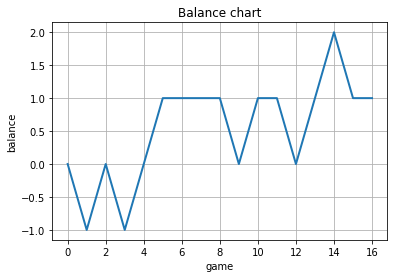

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import random

# Translates user input (R,P,S) to values (0,1,2) or -1 in case of exit 
def read_input(user_input):
  if user_input == "R":
    return 0
  elif user_input == "P":
    return 1
  elif user_input == "S":
    return 2
  elif user_input == "X":
    return -1
  else: return -2

# translates integer (0,1,2) to (R,P,S)

def get_sign(choice):P

  if (choice == 0):
    return 'R';
  elif (choice == 1):
    return 'P';
  elif (choice == 2):
    return 'S';
  else:
    return "wrong value";

def get_winner(u, c):
  if (u == c):
    return 0;

  if (u == 0):
    if (c == 1):
      return 1;
  if (u == 0):
    if (c == 2):
      return -1;

  if (u == 1):
    if (c == 0):
      return -1;
  if (u == 1):
    if (c == 2):
      return 1;

  if (u == 2):
    if (c == 0):
      return 1;
  if (u == 2):
    if (c == 1):
      return -1;

def get_winning_choice(opponent_predicted_choice):
  winning_choice = opponent_predicted_choice + 1
  if (winning_choice == 3):
    return 0
  else:
    return winning_choice

#Modify
prob_mod = 0.1;                     
prob_mod_rest = 0.05;

states = [0,1,2]
probability = [
          [0.34, 0.33, 0.33],
          [0.33, 0.34, 0.33],
          [0.33, 0.33, 0.34]]


print("Input your choice (R,P,S) to dialog window to START.")
print("Input 'X' to exit the game")

keep_playing = True;
game_counter = 0;  
balance = 0;
user_last = 0;

computer_choice = random.randint(0, 2) 

balance_list = [0]

while (keep_playing):
    game_counter+=1; #increment game counter
    print("Game no.",game_counter)
    # read and parse user input
    user_choice = input("Your move: ")
    choice = read_input(user_choice)
    
    if choice == -1:   
      keep_playing = False
      continue
    elif choice not in [0,1,2,-1]:
      print("Try again...")
      continue

    cc = get_sign(computer_choice);
    print("Opponent move:",cc)

    #who won
    winner = get_winner(choice,computer_choice);
    
    print(balance)
    # computer won
    if (winner == 1):
      print("You lost!")
      balance -= 1;
    elif (winner == 0):
      print("Draw!")
    else:
      print("You won!")
      balance += 1;

    
    balance_list.append(balance);

    print("***** *** * ************")

    # computer lost, modify probability matrix
    if winner == -1 and game_counter > 1:           
      computer_choice = random.randint(0, 2)
      mod1 = 1
      mod2 = 2
      if (choice == 1):
        mod1 = 0
      elif (choice == 2):
        mod2 = 0

      #modify
      probability[user_last][choice] += prob_mod
      probability[user_last][mod1] -= prob_mod_rest
      probability[user_last][mod2] -= prob_mod_rest
      
        # verify if probablility is still above zero after modification
      if probability[user_last][mod1] < 0 or probability[user_last][mod2] < 0:
        probability[user_last][choice] -= prob_mod
        probability[user_last][mod1] += prob_mod_rest
        probability[user_last][mod2] += prob_mod_rest

    #print(probability[user_last])

    # computer makes decision about next game
    if (game_counter < 2):
      computer_choice = random.randint(0, 2)
    else:
      user_predicted_choice = np.random.choice(states, replace = True, p = probability[choice])
      computer_choice = get_winning_choice(user_predicted_choice)

    # save user_last move
    user_last = choice;


# print balance chart
x = [x for x in range(len(balance_list))]
plt.plot(x,balance_list,linewidth=2)
plt.ylabel('balance')
plt.xlabel('game')
plt.title('Balance chart')
plt.grid(True)
plt.show()